In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fight_results_df = pd.read_csv('fight_results_with_locale.csv')
fight_stats_df = pd.read_csv('fight_stats_with_weghtclass_date_location.csv')
fighters_df = pd.read_csv('fighters_processed.csv')

In [32]:
fight_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36978 entries, 0 to 37045
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   EVENT                          36978 non-null  object 
 1   BOUT                           36978 non-null  object 
 2   ROUND                          36978 non-null  object 
 3   FIGHTER                        36978 non-null  object 
 4   KD                             36978 non-null  float64
 5   SIG.STR. %                     36978 non-null  float64
 6   TD %                           36978 non-null  float64
 7   SUB.ATT                        36978 non-null  float64
 8   REV.                           36978 non-null  float64
 9   CTRL                           36978 non-null  float64
 10  sig_str_attempt                36978 non-null  float64
 11  sig_str_land                   36978 non-null  float64
 12  total_str_attempt              36978 non-null  floa

In [3]:
fighters_df

,Name,Nickname,Weight_Class,Knockouts,Submissions,First_Round_Finishes,Striking_Accuracy,Takedown_Accuracy,Sig_Str_Attempted Total,Takedowns_Landed_Total,...,Sig_Strikes_Body_Total,Sig_Strikes_Body_Percent,Sig_Strikes_Leg_Total,Sig_Strikes_Leg_Percent,Win_by_KO/TKO_Total,Win_by_KO/TKO_Percent,Win_by_Decision_Total,Win_by_Decision_Percent,Win_by_Submission_Total,Win_by_Submission_Percent
0,Danny Abbadi,"""The Assassin""",Lightweight Division,0,0,0,0.38,0.00,155,0.0,...,8.0,0.14,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00
1,Nariman Abbassov,NaN,Lightweight Division,0,0,0,0.20,0.00,225,0.0,...,8.0,0.18,11.0,0.24,0.0,0.00,0.0,0.00,0.0,0.00
2,Tank Abbott,"""Tank""",Heavyweight Division,0,0,0,0.39,0.00,31,0.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00
3,Hamdy Abdelwahab,"""The Hammer""",Heavyweight Division,5,0,4,0.52,0.80,197,3.0,...,8.0,0.08,18.0,0.18,5.0,1.00,0.0,0.00,0.0,0.00
4,Mansur Abdul-Malik,NaN,Middleweight Division,6,1,6,0.55,0.00,141,0.0,...,2.0,0.03,1.0,0.01,6.0,0.86,0.0,0.00,1.0,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3010,James Zikic,"""The Messiah""",Light Heavyweight Division,0,0,0,0.44,0.00,66,0.0,...,8.0,0.28,1.0,0.03,0.0,0.00,0.0,0.00,0.0,0.00
3011,Cat Zingano,"""Alpha""",Women's Featherweight Division,5,3,0,0.61,0.65,295,13.0,...,46.0,0.25,28.0,0.15,5.0,0.50,2.0,0.20,3.0,0.30
3012,Igor Zinoviev,NaN,Middleweight Division,0,0,0,0.00,0.00,0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00
3013,Allan Zuniga,"""Tigre""",Lightweight Division,0,0,0,0.53,0.00,112,0.0,...,18.0,0.31,8.0,0.14,3.0,0.23,6.0,0.46,4.0,0.31


In [4]:
fight_stats_df

,EVENT,BOUT,ROUND,FIGHTER,KD,SIG.STR. %,TD %,SUB.ATT,REV.,CTRL,...,total_clinch_land,total_ground_attempt,total_ground_land,total_head_attempt,total_head_land,weight_class,gender,is_title_bout,DATE,LOCATION
0,ufc fight night: covington vs. buckley,colby covington vs. joaquin buckley,Round 1,colby covington,0.0,0.19,0.00,0.0,0.0,22.0,...,0.0,0.0,0.0,5.0,42.0,welterweight,0.0,0.0,12-14-24,"tampa, florida, usa"
1,ufc fight night: covington vs. buckley,colby covington vs. joaquin buckley,Round 2,colby covington,0.0,0.38,0.33,0.0,0.0,88.0,...,0.0,2.0,2.0,13.0,43.0,welterweight,0.0,0.0,12-14-24,"tampa, florida, usa"
2,ufc fight night: covington vs. buckley,colby covington vs. joaquin buckley,Round 3,colby covington,0.0,0.34,0.00,0.0,0.0,110.0,...,0.0,2.0,2.0,8.0,23.0,welterweight,0.0,0.0,12-14-24,"tampa, florida, usa"
3,ufc fight night: covington vs. buckley,colby covington vs. joaquin buckley,Round 1,joaquin buckley,0.0,0.41,0.00,0.0,0.0,9.0,...,2.0,2.0,4.0,18.0,47.0,welterweight,0.0,0.0,12-14-24,"tampa, florida, usa"
4,ufc fight night: covington vs. buckley,colby covington vs. joaquin buckley,Round 2,joaquin buckley,0.0,0.50,0.00,0.0,0.0,1.0,...,5.0,0.0,0.0,20.0,46.0,welterweight,0.0,0.0,12-14-24,"tampa, florida, usa"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37301,ufc 2: no way out,johnny rhodes vs. david levicki,Round 1,david levicki,0.0,0.80,0.00,0.0,0.0,0.0,...,2.0,1.0,1.0,4.0,5.0,open weight,0.0,0.0,03-11-94,"denver, colorado, usa"
37302,ufc 2: no way out,patrick smith vs. ray wizard,Round 1,patrick smith,0.0,1.00,0.00,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,open weight,0.0,0.0,03-11-94,"denver, colorado, usa"
37303,ufc 2: no way out,patrick smith vs. ray wizard,Round 1,ray wizard,0.0,1.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,open weight,0.0,0.0,03-11-94,"denver, colorado, usa"
37304,ufc 2: no way out,scott morris vs. sean daugherty,Round 1,scott morris,0.0,1.00,1.00,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,open weight,0.0,0.0,03-11-94,"denver, colorado, usa"


In [5]:
fight_results_df

,EVENT,BOUT,ROUND,TIME,FIGHTER_1,FIGHTER_2,Total_Rounds_Format,Main_round_time_Format,Num_overtime_rounds_Format,Overtime_round_time_Format,gender,is_title_bout,weight_class,fighter_1_result,fighter_2_result,method_label,weightclass_numeric,DATE,LOCATION
0,ufc fight night: covington vs. buckley,colby covington vs. joaquin buckley,3,282,colby covington,joaquin buckley,5.0,5.0,0.0,0.0,0,0,welterweight,0,1,0,5,12-14-24,"tampa, florida, usa"
1,ufc fight night: covington vs. buckley,cub swanson vs. billy quarantillo,3,96,cub swanson,billy quarantillo,3.0,5.0,0.0,0.0,0,0,featherweight,1,0,0,3,12-14-24,"tampa, florida, usa"
2,ufc fight night: covington vs. buckley,manel kape vs. bruno silva,3,117,manel kape,bruno silva,3.0,5.0,0.0,0.0,0,0,flyweight,1,0,0,1,12-14-24,"tampa, florida, usa"
3,ufc fight night: covington vs. buckley,vitor petrino vs. dustin jacoby,3,224,vitor petrino,dustin jacoby,3.0,5.0,0.0,0.0,0,0,light heavyweight,0,1,0,7,12-14-24,"tampa, florida, usa"
4,ufc fight night: covington vs. buckley,adrian yanez vs. daniel marcos,3,300,adrian yanez,daniel marcos,3.0,5.0,0.0,0.0,0,0,bantamweight,0,1,2,2,12-14-24,"tampa, florida, usa"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7925,ufc 2: no way out,orlando wiet vs. robert lucarelli,1,170,orlando wiet,robert lucarelli,NaN,NaN,NaN,NaN,0,0,open weight,1,0,0,10,03-11-94,"denver, colorado, usa"
7926,ufc 2: no way out,frank hamaker vs. thaddeus luster,1,292,frank hamaker,thaddeus luster,NaN,NaN,NaN,NaN,0,0,open weight,1,0,1,10,03-11-94,"denver, colorado, usa"
7927,ufc 2: no way out,johnny rhodes vs. david levicki,1,733,johnny rhodes,david levicki,NaN,NaN,NaN,NaN,0,0,open weight,1,0,0,10,03-11-94,"denver, colorado, usa"
7928,ufc 2: no way out,patrick smith vs. ray wizard,1,58,patrick smith,ray wizard,NaN,NaN,NaN,NaN,0,0,open weight,1,0,1,10,03-11-94,"denver, colorado, usa"


In [6]:
events_to_remove = [
    "ufc - ultimate ultimate '96",
    "ufc 10: the tournament",
    "ufc 9: motor city madness",
    "ufc 8: david vs goliath",
    "ufc - ultimate ultimate '95",
    "ufc 7: the brawl in buffalo",
    "ufc 6: clash of the titans",
    "ufc 5: the return of the beast",
    "ufc 4: revenge of the warriors",
    "ufc 3: the american dream",
    "ufc 2: no way out",
    'ufc - ultimate brazil', 'ufc 17: redemption',
       'ufc 16: battle in the bayou', 'ufc 12: judgement day',
       "ufc - ultimate ultimate '96", 'ufc 11: the proving ground',
]

# Remove rows where 'EVENT' matches the specified values
fight_results_df = fight_results_df[~fight_results_df['EVENT'].isin(events_to_remove)]
fight_stats_df = fight_stats_df[~fight_stats_df['EVENT'].isin(events_to_remove)]

In [7]:
def calculate(result):
    round = result['ROUND']
    time = result['TIME']
    if round == 1:
        result['total_time_seconds'] = time
    else:
        result['total_time_seconds'] = (round - 1) * result['Main_round_time_Format']*60 + time
    return result

In [8]:
fight_results_df = fight_results_df.apply(calculate, axis=1)

In [9]:
fight_results_df['DATE'] = pd.to_datetime(fight_results_df['DATE'])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17200\467472158.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fight_results_df['DATE'] = pd.to_datetime(fight_results_df['DATE'])


In [10]:
fight_results_df.to_csv('fight_results_with_locale_2.csv', index=False)

In [11]:
fight_results_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 7811
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   EVENT                       7787 non-null   object        
 1   BOUT                        7787 non-null   object        
 2   ROUND                       7787 non-null   int64         
 3   TIME                        7787 non-null   int64         
 4   FIGHTER_1                   7787 non-null   object        
 5   FIGHTER_2                   7787 non-null   object        
 6   Total_Rounds_Format         7787 non-null   float64       
 7   Main_round_time_Format      7787 non-null   float64       
 8   Num_overtime_rounds_Format  7708 non-null   float64       
 9   Overtime_round_time_Format  7787 non-null   float64       
 10  gender                      7787 non-null   int64         
 11  is_title_bout               7787 non-null   int64         
 1

## Analyzing fight_results_df

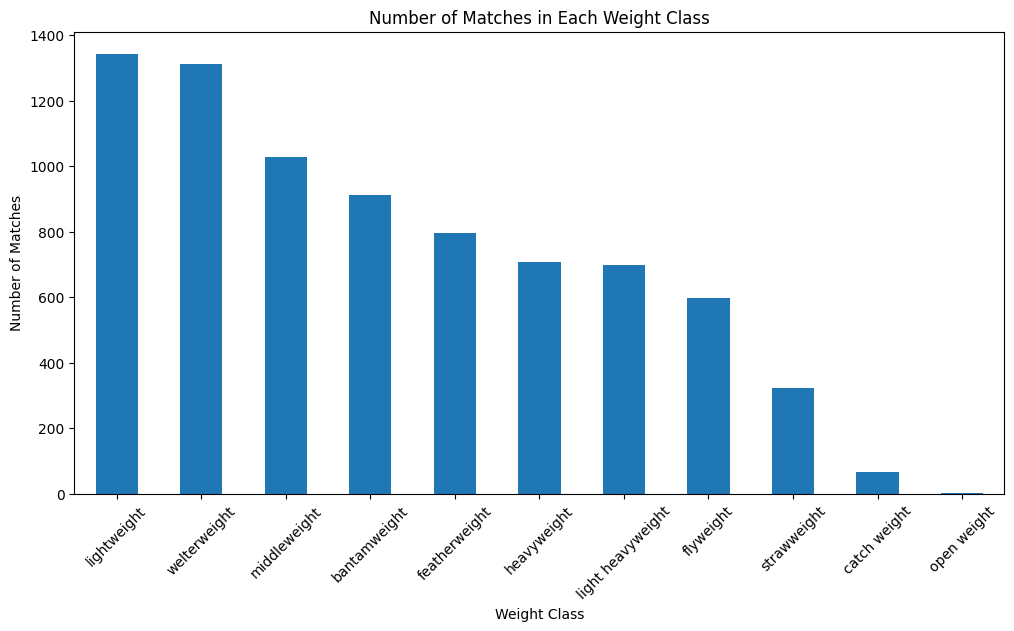

In [12]:
weight_class_counts = fight_results_df["weight_class"].value_counts()

plt.figure(figsize=(12, 6))
weight_class_counts.plot(kind="bar")
plt.title("Number of Matches in Each Weight Class")
plt.xlabel("Weight Class")
plt.ylabel("Number of Matches")
plt.xticks(rotation=45)
plt.show()


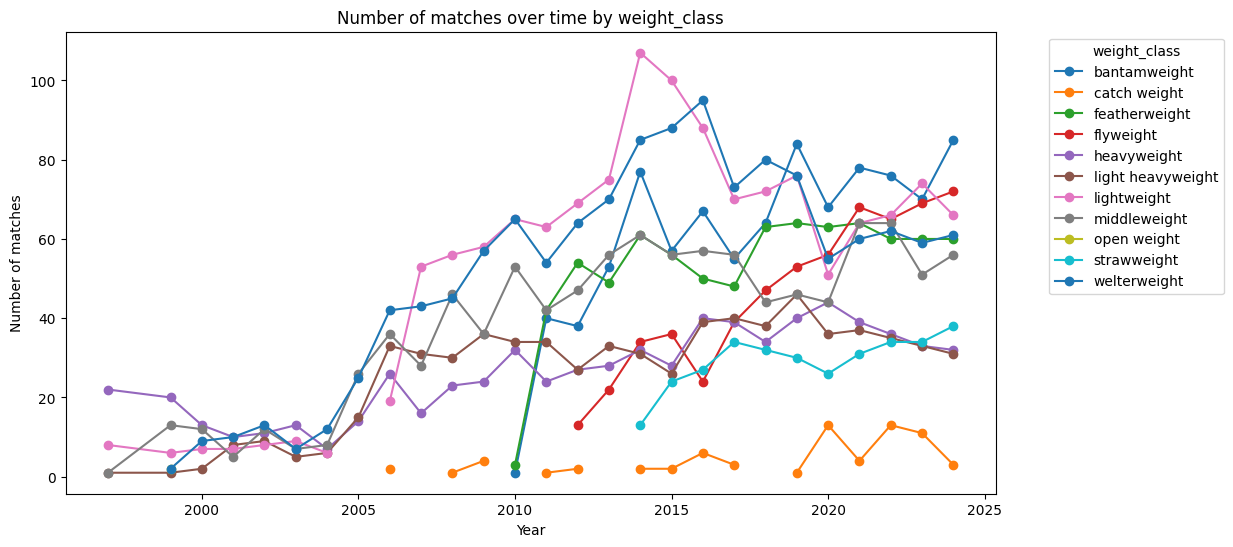

In [13]:
fight_counts_over_time = fight_results_df.groupby([fight_results_df["DATE"].dt.year, "weight_class"])["BOUT"].count().unstack()
fight_counts_over_time.plot(figsize=(12, 6), marker="o")
plt.title("Number of matches over time by weight_class")
plt.xlabel("Year")
plt.ylabel("Number of matches")
plt.legend(title="weight_class", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

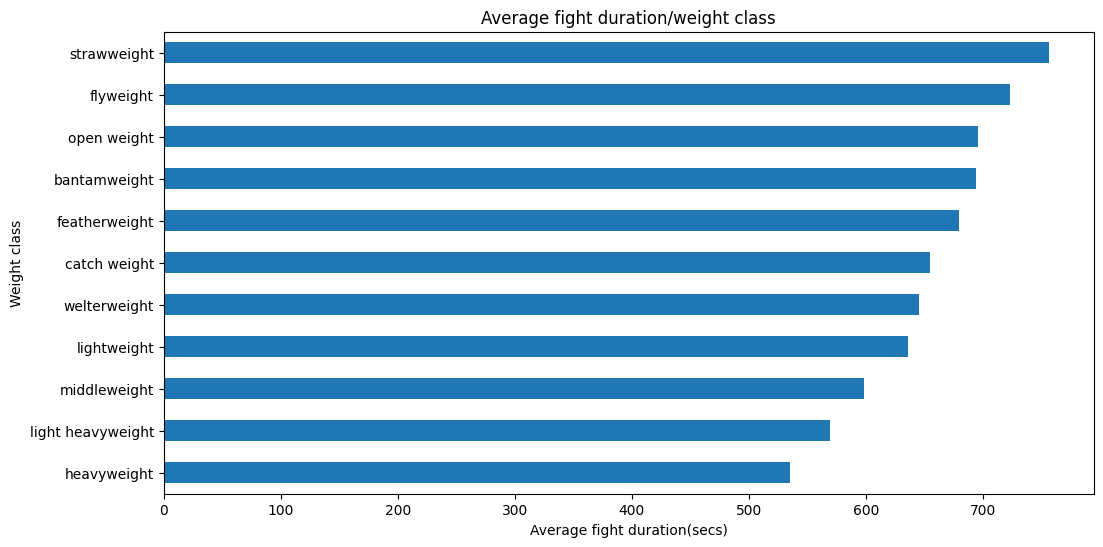

In [14]:
avg_fight_duration_per_weightclass = fight_results_df.groupby("weight_class")["total_time_seconds"].mean().sort_values()

plt.figure(figsize=(12, 6))
avg_fight_duration_per_weightclass.plot(kind="barh")
plt.title("Average fight duration/weight class")
plt.xlabel("Average fight duration(secs)")
plt.ylabel("Weight class")
plt.show()

<Figure size 1200x600 with 0 Axes>

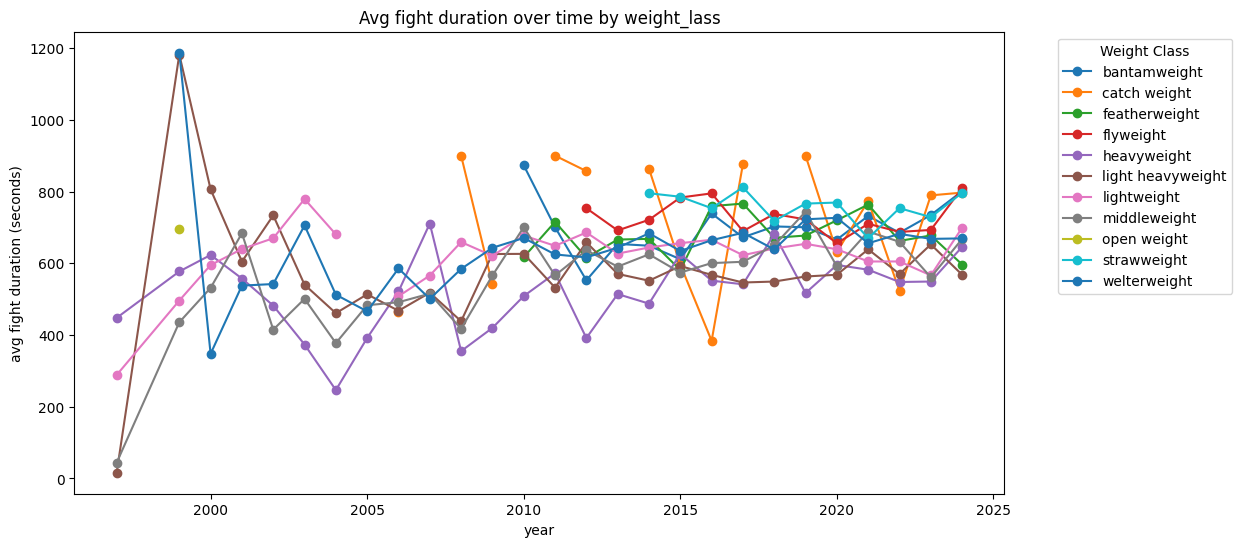

In [15]:

avg_duration_overtime = fight_results_df.groupby([fight_results_df["DATE"].dt.year, "weight_class"])["total_time_seconds"].mean().unstack()
plt.figure(figsize=(12, 6))
avg_duration_overtime.plot(marker="o", figsize=(12, 6))
plt.title("Avg fight duration over time by weight_lass")
plt.xlabel("year")
plt.ylabel("avg fight duration (seconds)")
plt.legend(title="Weight Class", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

### Hosting arenas

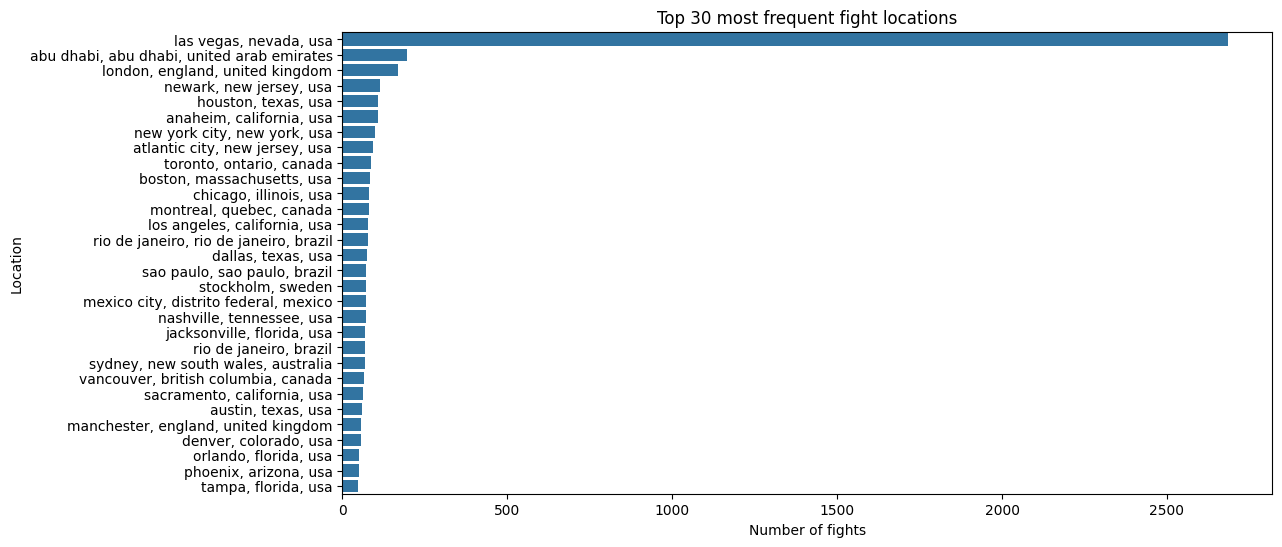

In [16]:
location_counts = fight_results_df["LOCATION"].value_counts().head(30)  

plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.values, y=location_counts.index)
plt.xlabel("Number of fights")
plt.ylabel("Location")
plt.title("Top 30 most frequent fight locations")
plt.show()

<Figure size 1200x600 with 0 Axes>

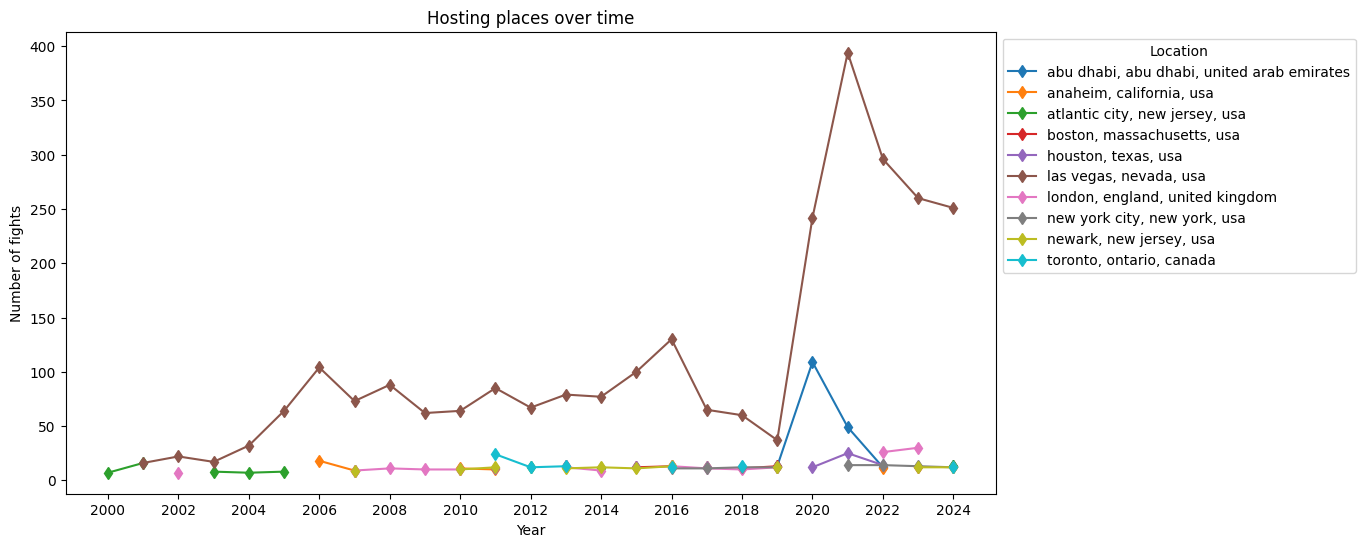

In [17]:
top_locations = fight_results_df["LOCATION"].value_counts().head(10).index

filtered_fights = fight_results_df[fight_results_df["LOCATION"].isin(top_locations)]

fights_over_time = filtered_fights.groupby([filtered_fights["DATE"].dt.year, "LOCATION"]).size().unstack()

plt.figure(figsize=(12, 6))
fights_over_time.plot(marker="d", figsize=(12, 6))
plt.title("Hosting places over time")
plt.xlabel("Year")
plt.xticks(range(fights_over_time.index.min(), fights_over_time.index.max() + 1, 2))
plt.ylabel("Number of fights")
plt.legend(title="Location", bbox_to_anchor=(1, 1), loc="upper left")
plt.show()


### Distribution of time between each events + over time

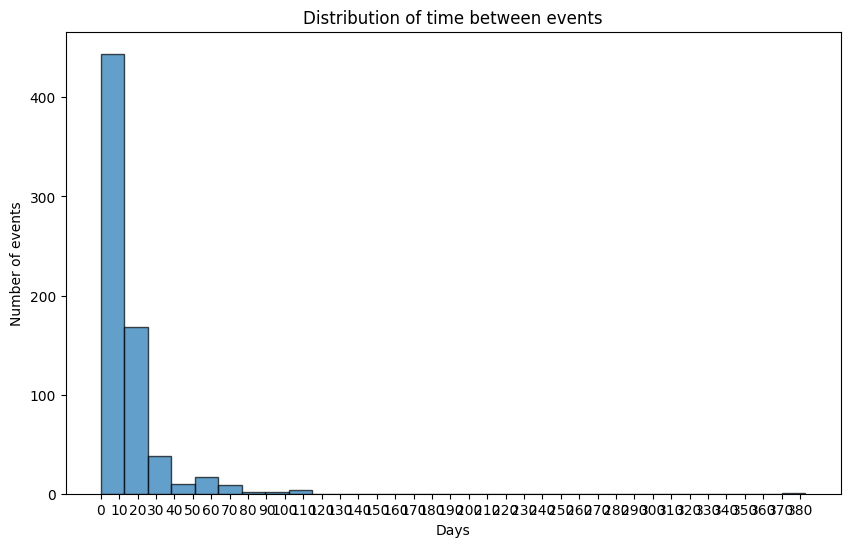

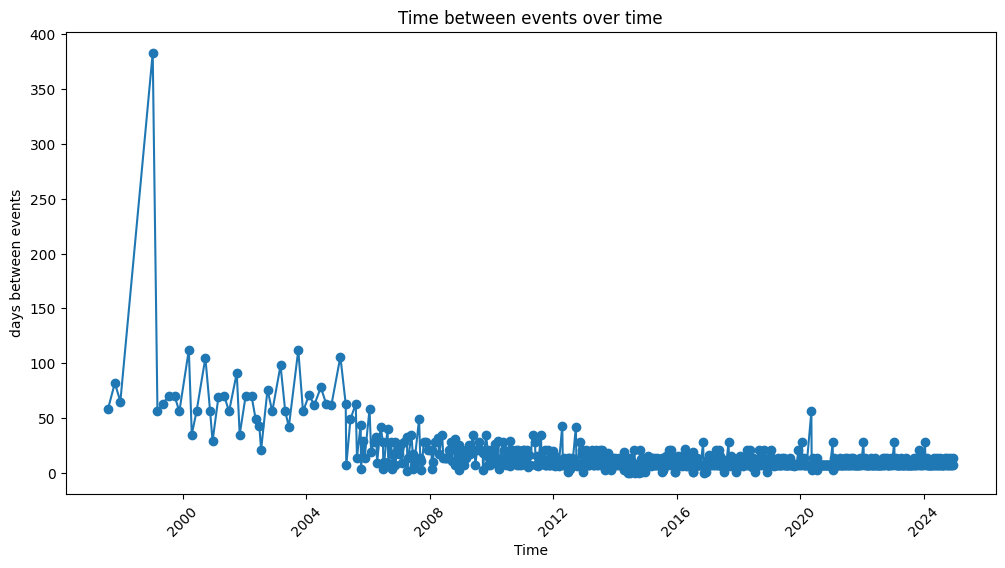

In [18]:
unique_events_df = fight_results_df[["EVENT", "DATE"]].drop_duplicates().sort_values(by="DATE")

unique_events_df["prev_DATE"] = unique_events_df["DATE"].shift(1)

unique_events_df["time_between_events_days"] = (unique_events_df["DATE"] - unique_events_df["prev_DATE"]).dt.days


plt.figure(figsize=(10, 6))
plt.hist(unique_events_df["time_between_events_days"].dropna(), bins=30, edgecolor="black", alpha=0.7)
plt.title("Distribution of time between events")
plt.xlabel("Days")
plt.xticks(np.arange(0, unique_events_df["time_between_events_days"].max() + 5, 10))
plt.ylabel("Number of events")
plt.show()
 
plt.figure(figsize=(12, 6))
plt.plot(unique_events_df["DATE"], unique_events_df["time_between_events_days"], marker="o", linestyle="-")
plt.title("Time between events over time")
plt.xlabel("Time")
plt.ylabel("days between events")
plt.xticks(rotation=45)
plt.show()

method_mapping_numeric = {

    "ko/tko": 0,

    "tko - doctor's stoppage": 0,

    "submission": 1,

    "decision - unanimous": 2,

    "decision - split": 2,

    "decision - majority": 2,

    "could not continue": 0,

    "dq": 3,

    "overturned": 4,
    
    "other": 4
}

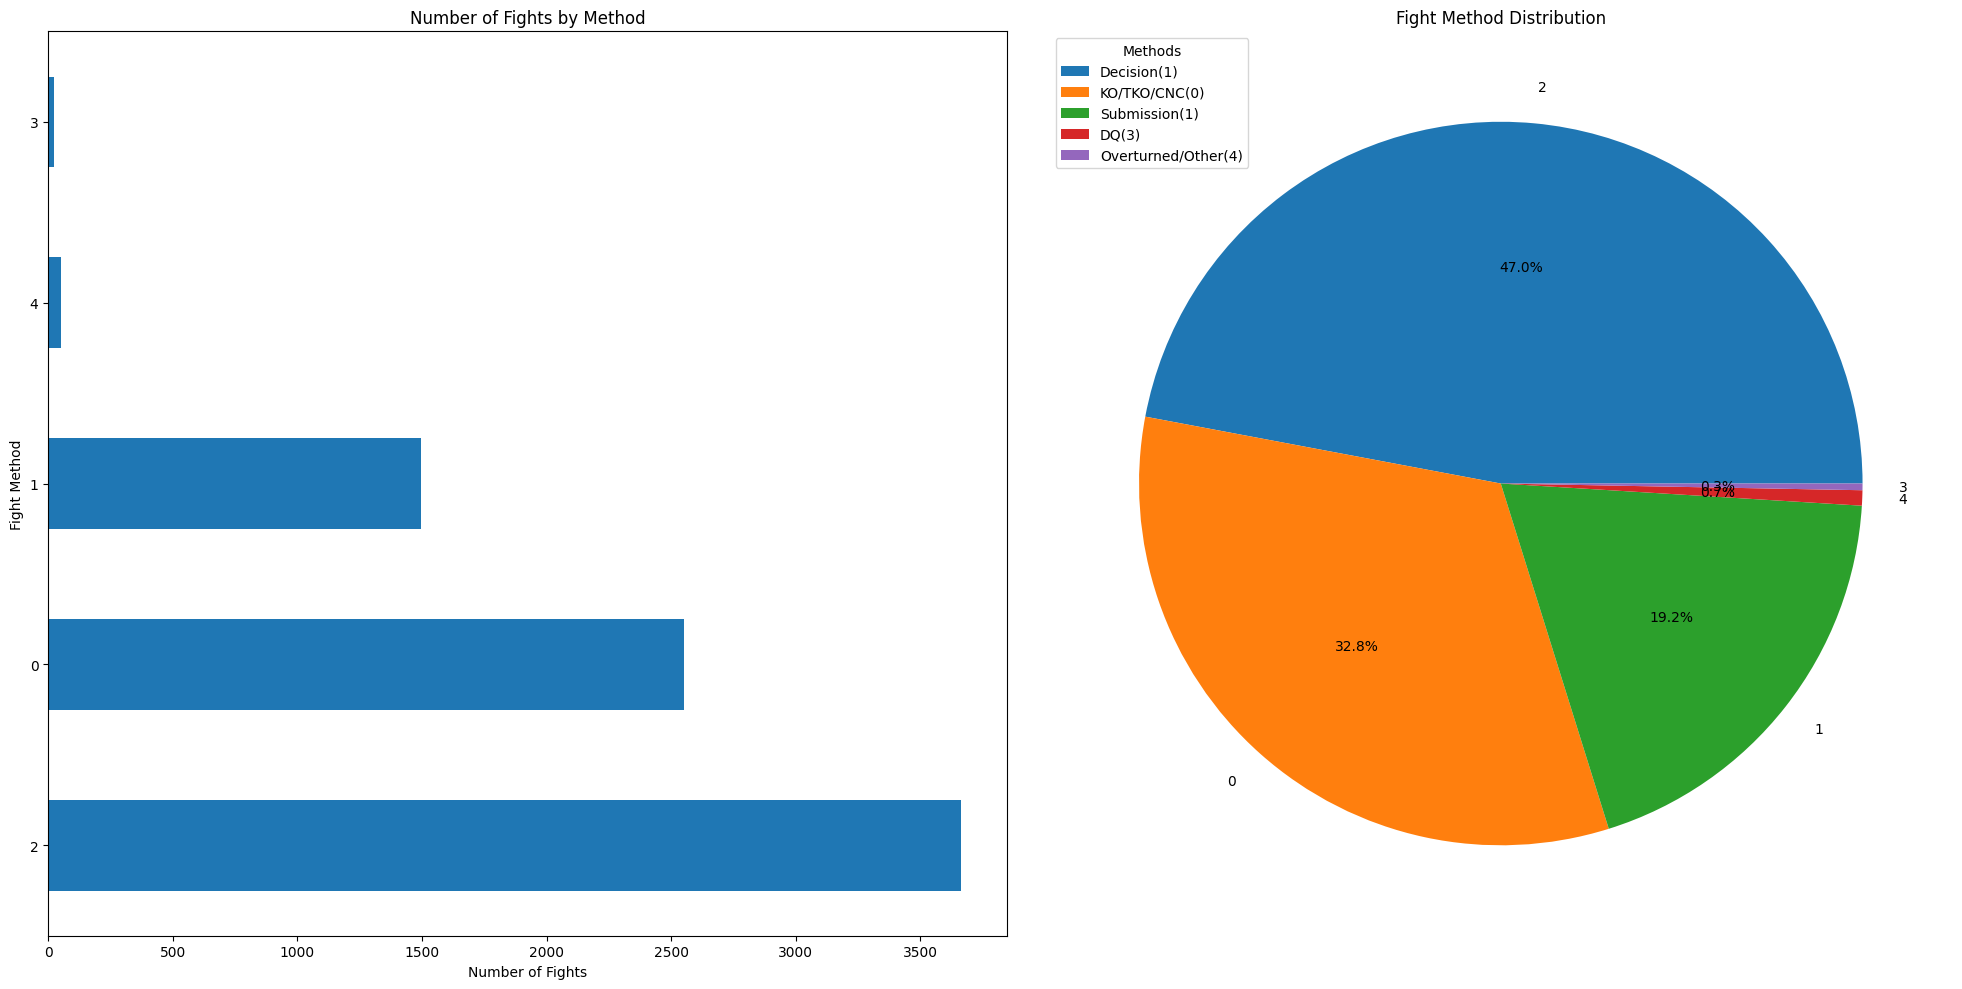

In [19]:
methods_group = fight_results_df['method_label'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

methods_group.plot(kind="barh", ax = axs[0])
axs[0].set_title("Number of Fights by Method")
axs[0].set_xlabel("Number of Fights")
axs[0].set_ylabel("Fight Method")

wedges, texts, autotexts = axs[1].pie(methods_group, labels=methods_group.index,autopct="%1.1f%%")
axs[1].set_title("Fight Method Distribution")
axs[1].set_ylabel("")  
custom_labels = ['Decision(1)', 'KO/TKO/CNC(0)', 'Submission(1)', 'DQ(3)', 'Overturned/Other(4)']
axs[1].legend(wedges, custom_labels, title="Methods",loc="upper left")

plt.tight_layout()

<Figure size 1500x800 with 0 Axes>

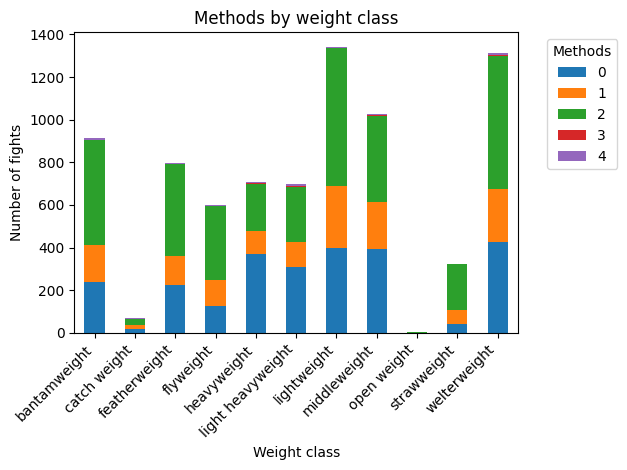

In [20]:
methods_by_weight = fight_results_df.groupby(['weight_class', 'method_label']).size().unstack()


plt.figure(figsize=(15, 8))
methods_by_weight.plot(kind='bar', stacked=True)

plt.title('Methods by weight class')
plt.xlabel('Weight class')
plt.ylabel('Number of fights')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

In [21]:

fight_results_df.columns

Index(['EVENT', 'BOUT', 'ROUND', 'TIME', 'FIGHTER_1', 'FIGHTER_2',
       'Total_Rounds_Format', 'Main_round_time_Format',
       'Num_overtime_rounds_Format', 'Overtime_round_time_Format', 'gender',
       'is_title_bout', 'weight_class', 'fighter_1_result', 'fighter_2_result',
       'method_label', 'weightclass_numeric', 'DATE', 'LOCATION',
       'total_time_seconds'],
      dtype='object')

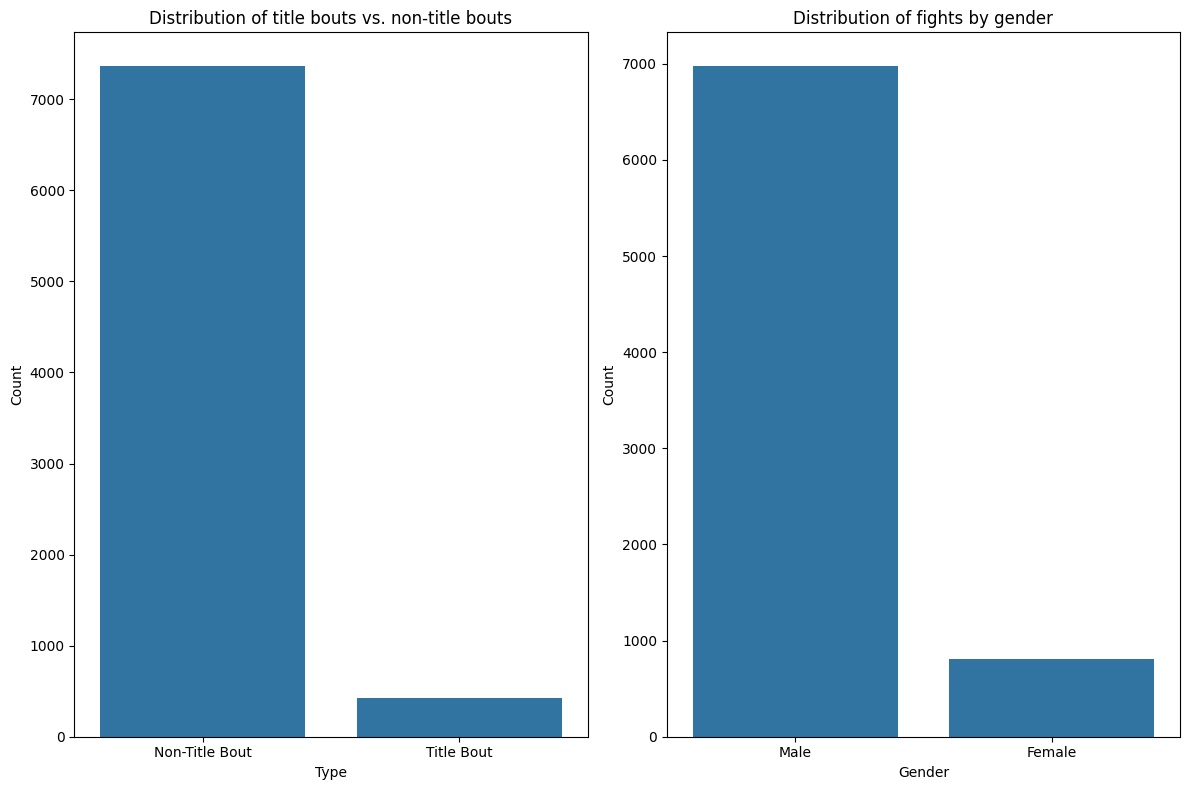

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))


sns.countplot(x=fight_results_df["is_title_bout"],ax=axes[0])
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Non-Title Bout", "Title Bout"])
axes[0].set_title("Distribution of title bouts vs. non-title bouts")
axes[0].set_xlabel("Type")
axes[0].set_ylabel("Count")


sns.countplot(x=fight_results_df["gender"], ax=axes[1])
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Male", "Female"])  
axes[1].set_title("Distribution of fights by gender")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Count")
plt.tight_layout()
plt.show()

## fight_stats_df

In [23]:
fight_stats_df

,EVENT,BOUT,ROUND,FIGHTER,KD,SIG.STR. %,TD %,SUB.ATT,REV.,CTRL,...,total_clinch_land,total_ground_attempt,total_ground_land,total_head_attempt,total_head_land,weight_class,gender,is_title_bout,DATE,LOCATION
0,ufc fight night: covington vs. buckley,colby covington vs. joaquin buckley,Round 1,colby covington,0.0,0.19,0.00,0.0,0.0,22.0,...,0.0,0.0,0.0,5.0,42.0,welterweight,0.0,0.0,12-14-24,"tampa, florida, usa"
1,ufc fight night: covington vs. buckley,colby covington vs. joaquin buckley,Round 2,colby covington,0.0,0.38,0.33,0.0,0.0,88.0,...,0.0,2.0,2.0,13.0,43.0,welterweight,0.0,0.0,12-14-24,"tampa, florida, usa"
2,ufc fight night: covington vs. buckley,colby covington vs. joaquin buckley,Round 3,colby covington,0.0,0.34,0.00,0.0,0.0,110.0,...,0.0,2.0,2.0,8.0,23.0,welterweight,0.0,0.0,12-14-24,"tampa, florida, usa"
3,ufc fight night: covington vs. buckley,colby covington vs. joaquin buckley,Round 1,joaquin buckley,0.0,0.41,0.00,0.0,0.0,9.0,...,2.0,2.0,4.0,18.0,47.0,welterweight,0.0,0.0,12-14-24,"tampa, florida, usa"
4,ufc fight night: covington vs. buckley,colby covington vs. joaquin buckley,Round 2,joaquin buckley,0.0,0.50,0.00,0.0,0.0,1.0,...,5.0,0.0,0.0,20.0,46.0,welterweight,0.0,0.0,12-14-24,"tampa, florida, usa"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37041,ufc 13: the ultimate force,guy mezger vs. christophe leninger,Round 2,christophe leninger,0.0,0.33,0.00,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,2.0,lightweight,0.0,0.0,05-30-97,"augusta, georgia, usa"
37042,ufc 13: the ultimate force,jack nilson vs. saeed hosseini,Round 1,jack nilson,0.0,0.84,0.00,0.0,0.0,0.0,...,0.0,11.0,11.0,11.0,13.0,lightweight,0.0,0.0,05-30-97,"augusta, georgia, usa"
37043,ufc 13: the ultimate force,jack nilson vs. saeed hosseini,Round 1,saeed hosseini,0.0,0.20,0.00,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,4.0,lightweight,0.0,0.0,05-30-97,"augusta, georgia, usa"
37044,ufc 13: the ultimate force,tito ortiz vs. wes albritton,Round 1,tito ortiz,0.0,0.87,1.00,0.0,0.0,0.0,...,0.0,20.0,23.0,20.0,23.0,lightweight,0.0,0.0,05-30-97,"augusta, georgia, usa"


In [24]:
fight_stats_df.columns

Index(['EVENT', 'BOUT', 'ROUND', 'FIGHTER', 'KD', 'SIG.STR. %', 'TD %',
       'SUB.ATT', 'REV.', 'CTRL', 'sig_str_attempt', 'sig_str_land',
       'total_str_attempt', 'total_str_land', 'touchdown_attempt',
       'takedown_land', 'total_leg_attempt', 'total_leg_land',
       'total_distance_strike_attempt', 'total_distance_strike_land',
       'total_body_attempt', 'total_body_land', 'total_clinch_attempt',
       'total_clinch_land', 'total_ground_attempt', 'total_ground_land',
       'total_head_attempt', 'total_head_land', 'weight_class', 'gender',
       'is_title_bout', 'DATE', 'LOCATION'],
      dtype='object')

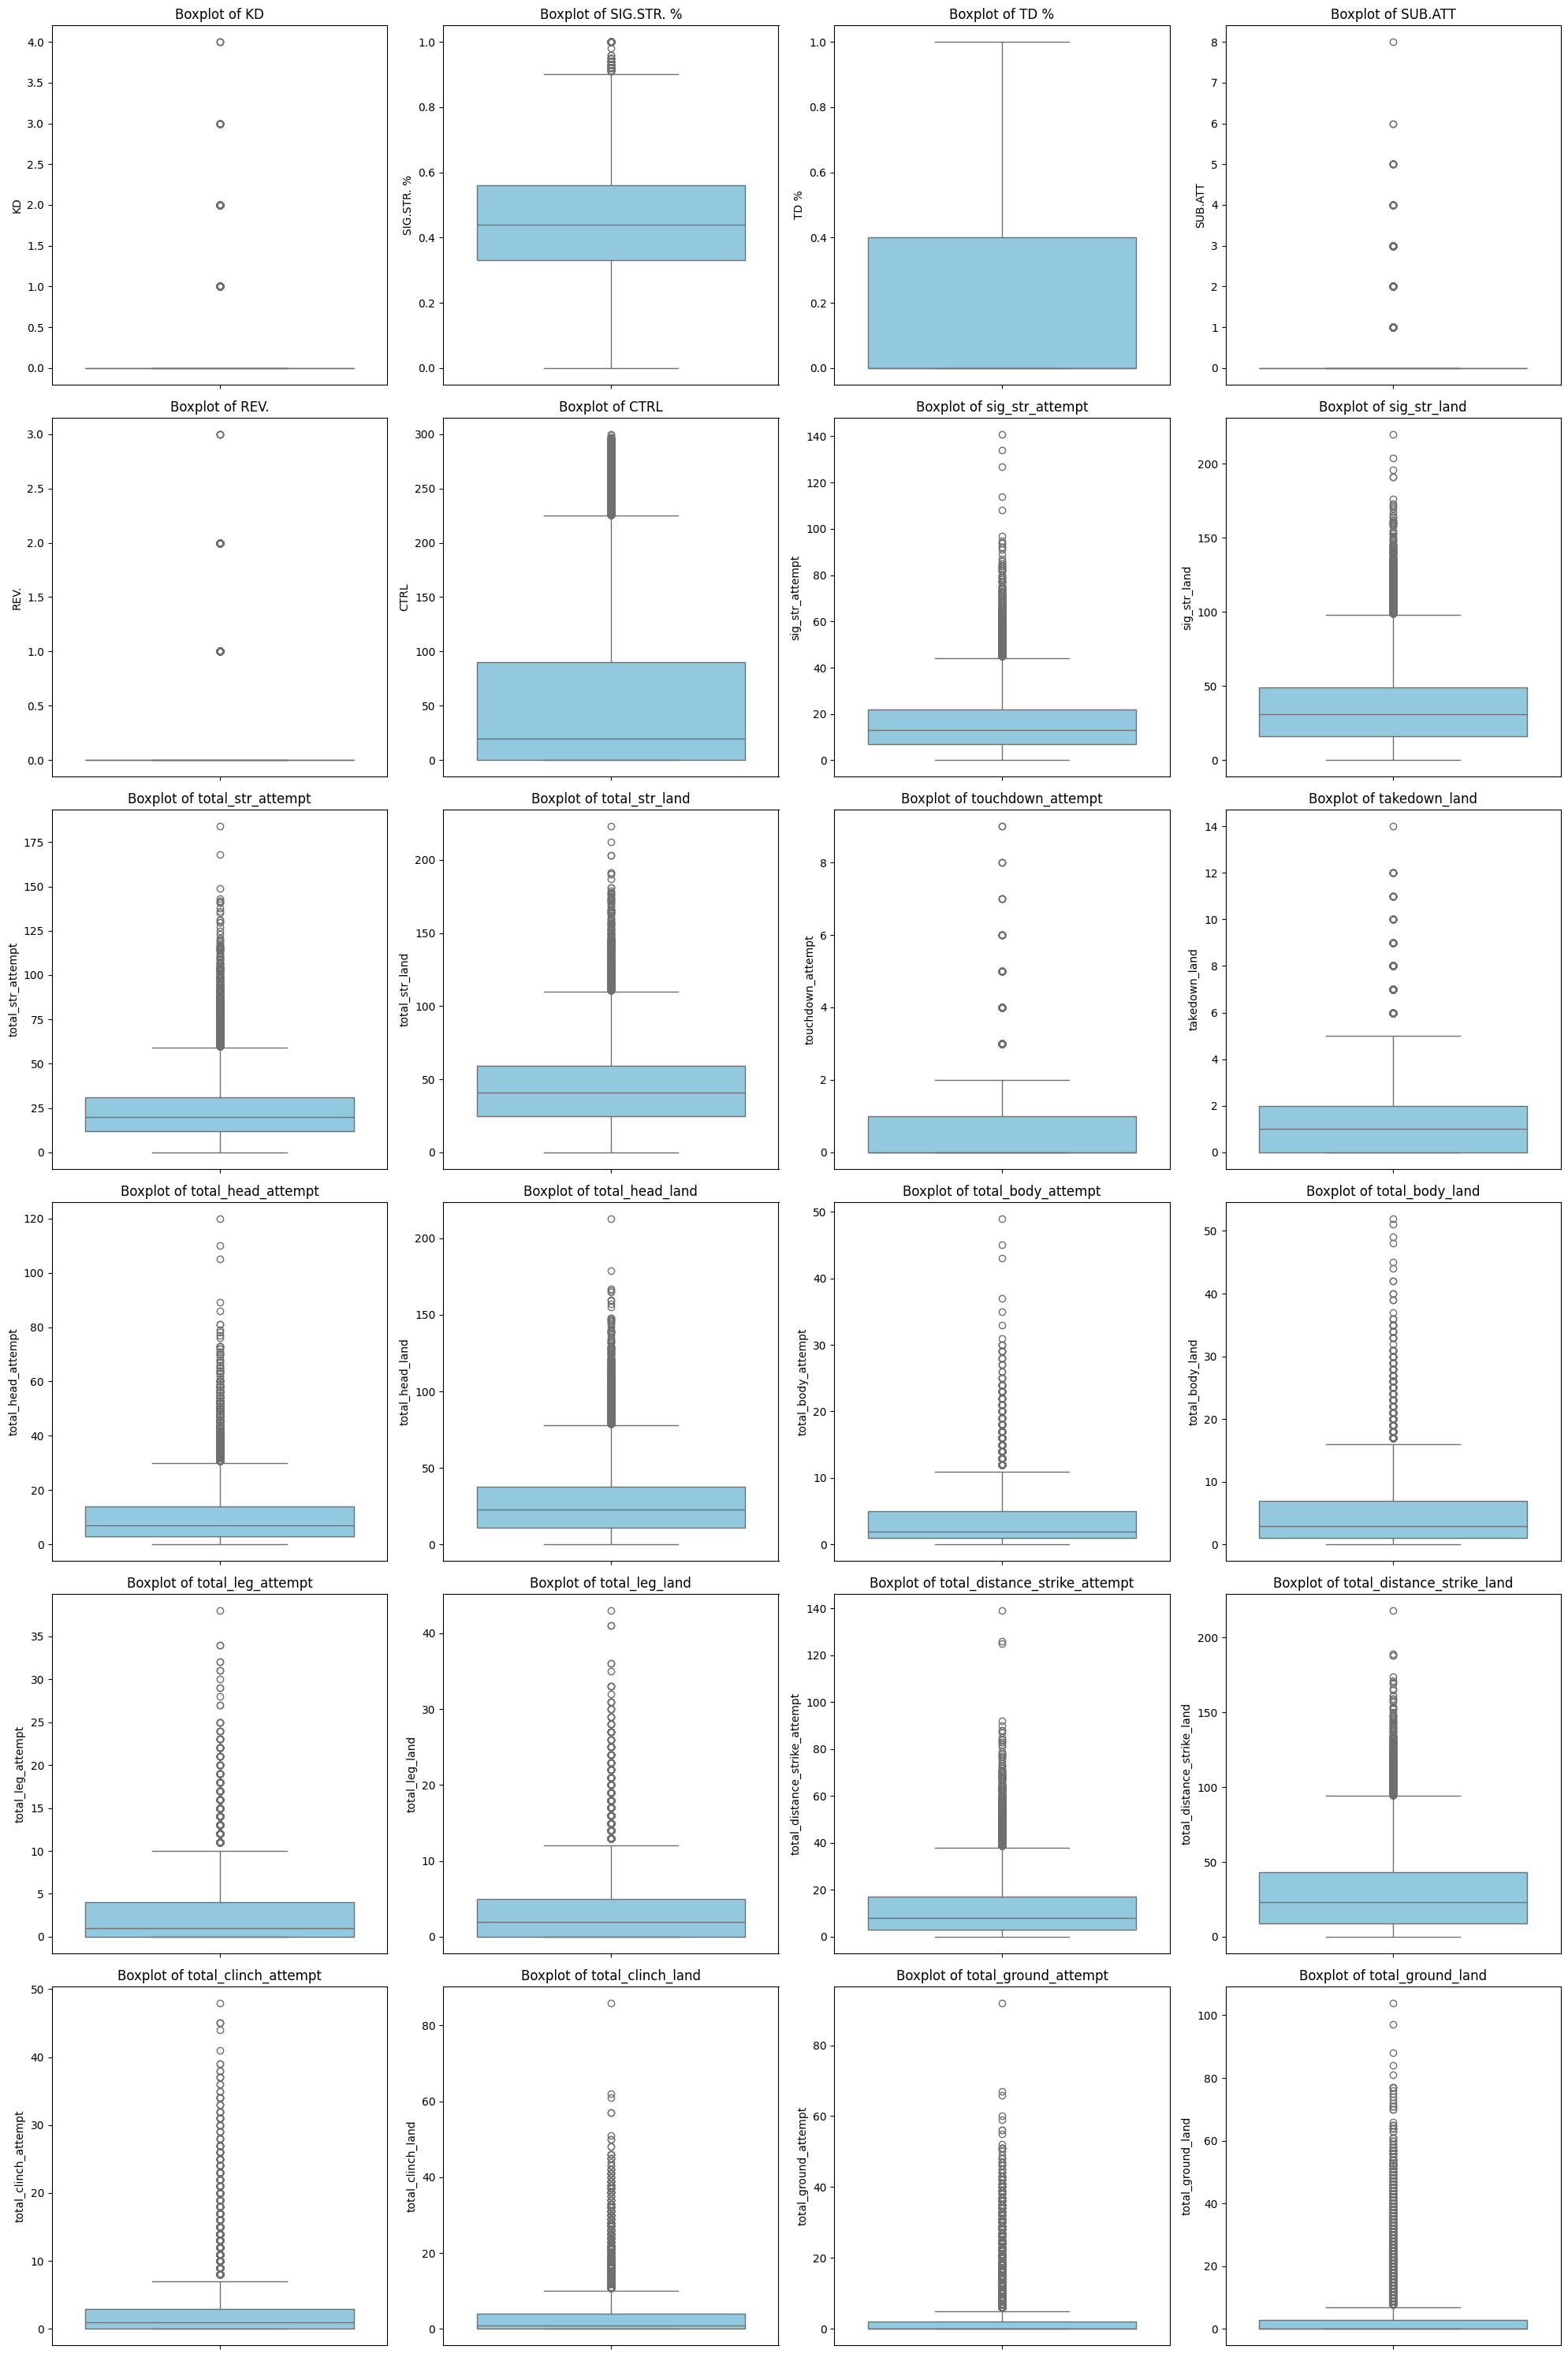

In [25]:
numerical_columns = ["KD", "SIG.STR. %", "TD %", "SUB.ATT", "REV.", "CTRL", 
                     "sig_str_attempt", "sig_str_land", "total_str_attempt", "total_str_land",
                     "touchdown_attempt", "takedown_land", "total_head_attempt", "total_head_land",
                     "total_body_attempt", "total_body_land", "total_leg_attempt", "total_leg_land",
                        "total_distance_strike_attempt", "total_distance_strike_land", "total_clinch_attempt", "total_clinch_land",
                    "total_ground_attempt", "total_ground_land"
                     ]
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 30))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(y=fight_stats_df[col], ax=axes[i], color="skyblue")
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

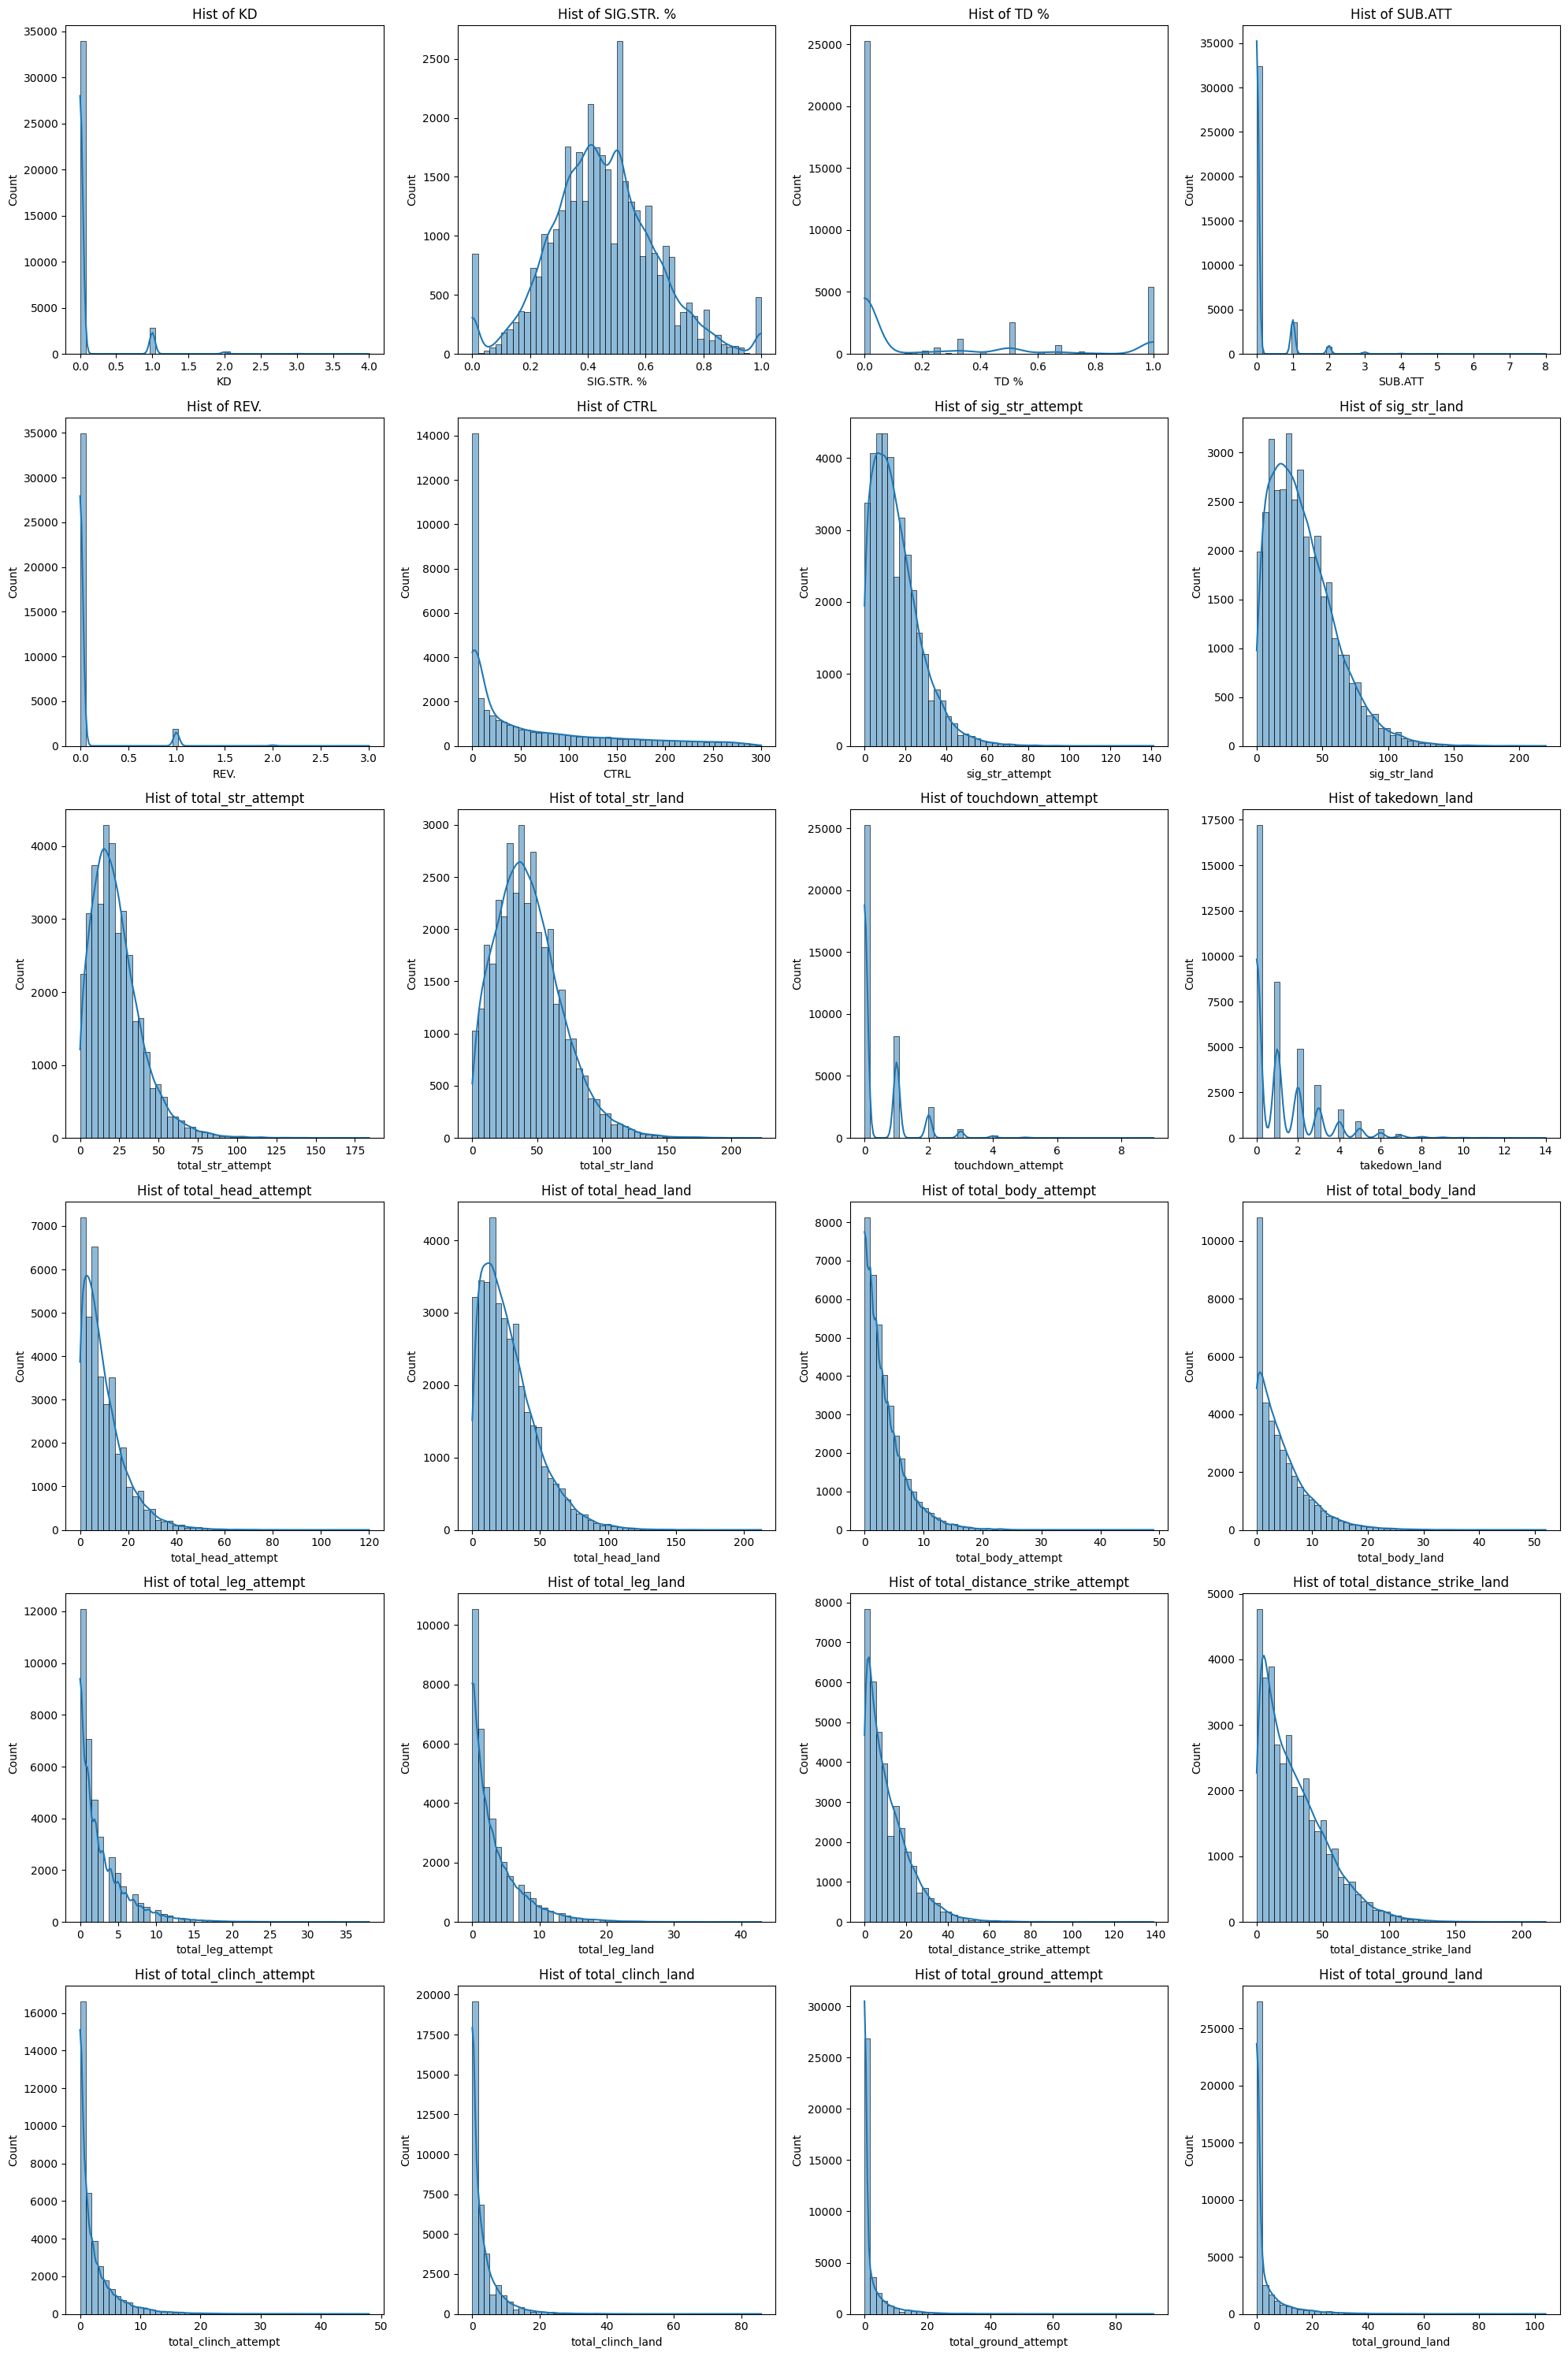

In [26]:
numerical_columns = ["KD", "SIG.STR. %", "TD %", "SUB.ATT", "REV.", "CTRL", 
                     "sig_str_attempt", "sig_str_land", "total_str_attempt", "total_str_land",
                     "touchdown_attempt", "takedown_land", "total_head_attempt", "total_head_land",
                     "total_body_attempt", "total_body_land", "total_leg_attempt", "total_leg_land",
                        "total_distance_strike_attempt", "total_distance_strike_land", "total_clinch_attempt", "total_clinch_land",
                    "total_ground_attempt", "total_ground_land"
                     ]
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 30))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(fight_stats_df[col], ax=axes[i],bins=50,kde=True)
    axes[i].set_title(f"Hist of {col}")
    axes[i].set_xlabel(col)
    

plt.tight_layout()
plt.show()

In [27]:
fight_stats_df.columns

Index(['EVENT', 'BOUT', 'ROUND', 'FIGHTER', 'KD', 'SIG.STR. %', 'TD %',
       'SUB.ATT', 'REV.', 'CTRL', 'sig_str_attempt', 'sig_str_land',
       'total_str_attempt', 'total_str_land', 'touchdown_attempt',
       'takedown_land', 'total_leg_attempt', 'total_leg_land',
       'total_distance_strike_attempt', 'total_distance_strike_land',
       'total_body_attempt', 'total_body_land', 'total_clinch_attempt',
       'total_clinch_land', 'total_ground_attempt', 'total_ground_land',
       'total_head_attempt', 'total_head_land', 'weight_class', 'gender',
       'is_title_bout', 'DATE', 'LOCATION'],
      dtype='object')

In [28]:
stats_to_plot = ["SIG.STR. %","sig_str_land","TD %", "takedown_land", "CTRL", "total_distance_strike_attempt"]

# Group by round and calculate mean values for each stat
round_stats = fight_stats_df.groupby("ROUND_NUM")[stats_to_plot].mean()

# Plot each stat
for stat in stats_to_plot:
    plt.figure(figsize=(8, 5))
    plt.plot(round_stats.index, round_stats[stat], marker="o", linestyle="-")
    plt.xlabel("Round")
    plt.ylabel(stat.replace("_", " ").title())
    plt.title(f"Average {stat.replace('_', ' ').title()} per Round")
    plt.grid(True)
    plt.show()

KeyError: 'ROUND_NUM'

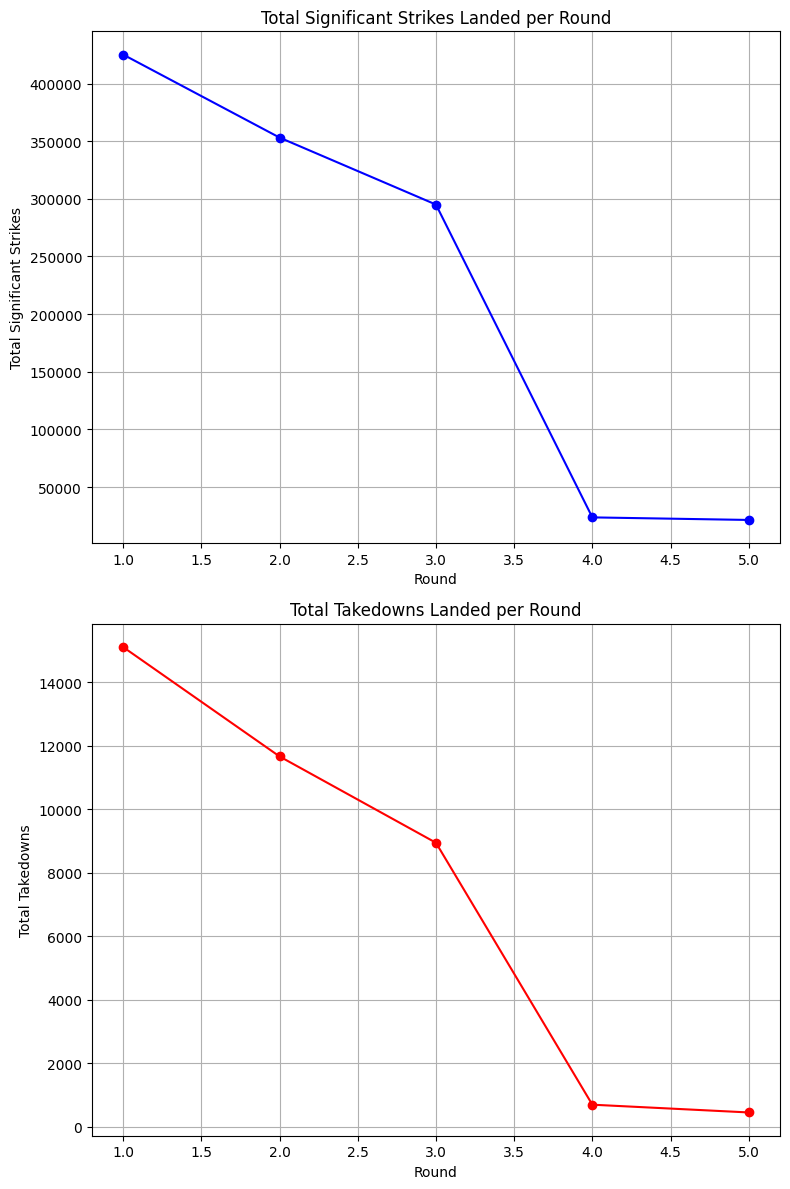

In [ ]:
fight_stats_df["TOTAL_SIG_STR"] = fight_stats_df["total_head_land"] + fight_stats_df["total_ground_land"]  # Approximate total sig. strikes
sig_strikes_per_round = fight_stats_df.groupby("ROUND_NUM")["TOTAL_SIG_STR"].sum()

# Total takedowns landed per round
fight_stats_df["TD_LANDED"] = fight_stats_df["TD %"] * fight_stats_df["total_ground_attempt"]  
takedowns_per_round = fight_stats_df.groupby("ROUND_NUM")["TD_LANDED"].sum()




fig, axs = plt.subplots(2, 1, figsize=(8, 12))

axs[0].plot(sig_strikes_per_round.index, sig_strikes_per_round, marker="o", linestyle="-", color="b")
axs[0].set_title("Total Significant Strikes Landed per Round")
axs[0].set_xlabel("Round")
axs[0].set_ylabel("Total Significant Strikes")
axs[0].grid(True)

axs[1].plot(takedowns_per_round.index, takedowns_per_round, marker="o", linestyle="-", color="r")
axs[1].set_title("Total Takedowns Landed per Round")
axs[1].set_xlabel("Round")
axs[1].set_ylabel("Total Takedowns")
axs[1].grid(True)

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'layout_dash'